In [16]:
from barplots import barplots
import pandas as pd

In [20]:
meta_model = "cnn"
df = pd.read_csv(f"{meta_model}.csv")

In [21]:
custom_defaults = {
    "AE vs IE": "active_enhancers_vs_inactive_enhancers",
    "IE vs IP": "inactive_enhancers_vs_inactive_promoters",
    "AP vs IP": "active_promoters_vs_inactive_promoters",
    "AE vs AP": "active_enhancers_vs_active_promoters",
    "A vs I": "active_vs_inactive",
}

Rendering barplots:   0%|          | 0/3 [00:00<?, ?it/s]

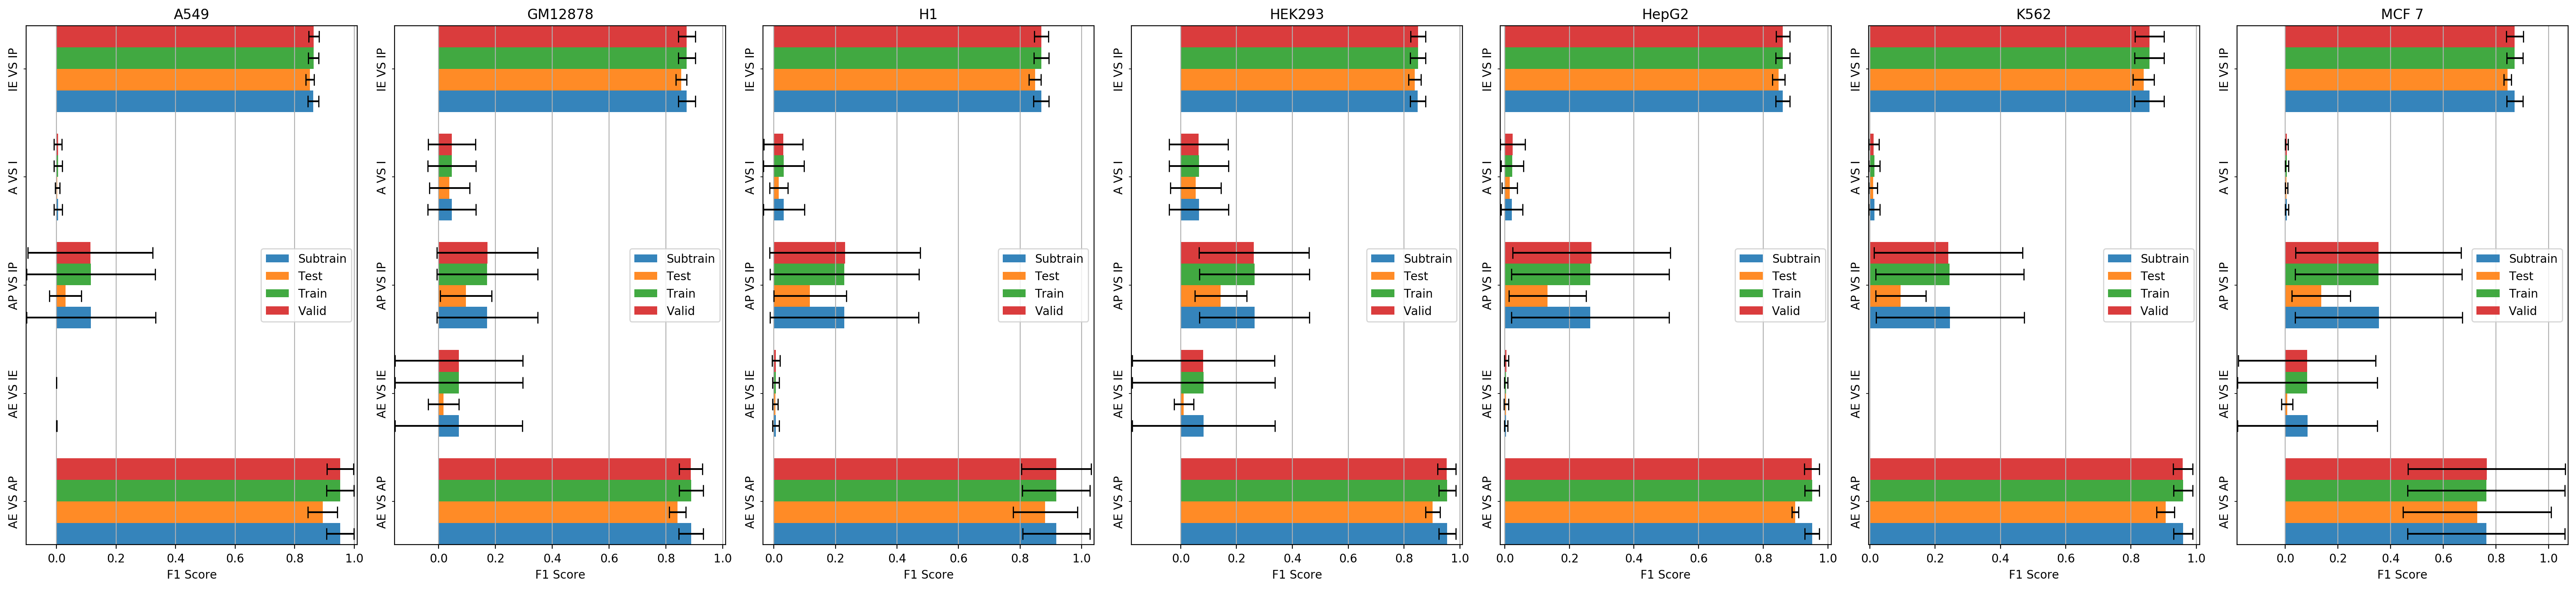

In [ ]:
index = ["cell_line", "task", "run_type"]
fig, axes = barplots(
    df.drop(columns=["holdout_number"])[index+["AUROC", "AUPRC", "f1_score"]],
    groupby=index,
    custom_defaults=custom_defaults,
    subplots=True,
    path=f'barplots_{meta_model}/{{feature}}.png',
    plots_per_row=7,
    orientation="horizontal",
    unique_minor_labels=False,
    minor_rotation=90
)